# Imaging Performance Comparison (Quiet Sun)
This notebook loops over different noise levels and calibration errors to generate, corrupt, image, and compare solar flare datasets.

In [100]:
import fasr_solar_simul as fss
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from scipy.constants import c
import os
from casatasks import tclean, applycal, clearcal
from datetime import datetime
from pathlib import Path
from tqdm import tqdm
import timeit

# Speed of light in m/s
C_LIGHT = c
import matplotlib
%matplotlib inline

In [101]:
from importlib import reload

reload(fss)
target = 'Quiet_Sun'
figsubfolder = 'figs/'
model_dir = '../fasr_sim/skymodels/quiet_sun/'

# Imaging Performance Comparison
looping over different noise levels and calibration errors to generate, corrupt, image, and compare

## Set up the simulation

In [102]:
# List of all available frequencies in GHz
freq_list = ['1GHz', '2GHz', '5GHz', '10GHz', '20GHz']
imsizes = [512, 512, 1024, 2048, 4096]
cells = ['4.8arcsec', '4.8arcsec', '2.4arcsec', '1.2arcsec', '0.6arcsec']
scales = [[0, 5, 10, 50], [0, 4, 10, 40], [0, 6, 20, 80], [0, 5, 10, 40, 160], [0, 10, 40, 80, 320]]
#freq_list = ['1GHz', '10GHz']
#imsizes = [512, 2048]
#cells = ['4.8arcsec', '1.2arcsec']
#scales = [[0, 5, 10, 50], [0, 5, 10, 40, 160]]

# List of configurations
project = 'FASR-A'
config_files = ['fasr_Log_Spiral-168.cfg', 'fasr-a_random_spiral_hybrid_120.cfg']

## Antenna temperature noise levels
noise_levels = ['0.005MK', '0.01MK'][:1]

## Define the fractional gain errors tuples: (phase and amplitude)
# 6 degrees (or 1.7% of phase error is equivalent to 10% of amplitude error )
#cal_errors = [(0., 0.), (0.017, 0.1)]
cal_errors = [(0., 0.)]

# Reference timestamp for the observation series
reftime_obj = datetime(2020, 11, 26, 20, 0, 0)

# Flags to control overwriting existing data products
overwrite_ms   = False  # Overwrite measurement set?
overwrite_im   = False  # Overwrite image products?
overwrite_plot = True  # Overwrite existing plots?

# Deconvolution algorithm choice
#deconvolver = 'hogbom'
#niter = 0
#weighting = 'uniform'

deconvolver = 'multiscale'
niter = 10000

# Imaging parameters (in seconds)
integration_time = 1  # Time per integration
duration         = 1  # Total imaging duration

## Simulate visibility and image

Start plotting
Peak of fasr_fasr_Log_Spiral-168_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 1.301e+06 K
rms of fasr_fasr_Log_Spiral-168_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 5.968e+03 K
SNR of the image: 217.9
Plotting image with vmin=-5.968e+04 K, vmax=6.503e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:21:57; runtime: 3.40 seconds
Start plotting
Peak of fasr_fasr_Log_Spiral-168_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 5.599e+05 K
rms of fasr_fasr_Log_Spiral-168_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.555e+03 K
SNR of the image: 219.2
Plotting image with vmin=-2.555e+04 K, vmax=2.800e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:21:59; runtime: 0.91 seconds
Start plotting
Peak of fasr_fasr_Log_Spiral-168_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 3.798e+05 K
rms of fasr_fasr_Log_Spiral-168_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 3.277e+03 K
SNR of the image: 115.9
Plotting image with vmin=-3.277e+04 K, vmax=1.899e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:00; runtime: 0.95 seconds
Start plotting
Peak of fasr_fasr_Log_Spiral-168_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 6.089e+05 K
rms of fasr_fasr_Log_Spiral-168_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 5.327e+03 K
SNR of the image: 114.3
Plotting image with vmin=-5.327e+04 K, vmax=3.045e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:02; runtime: 1.39 seconds
Start plotting
Peak of fasr_fasr_Log_Spiral-168_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 8.291e+05 K
rms of fasr_fasr_Log_Spiral-168_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 6.399e+03 K
SNR of the image: 129.6
Plotting image with vmin=-6.399e+04 K, vmax=4.146e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:05; runtime: 2.89 seconds
Start plotting
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 1.333e+06 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 6.354e+03 K
SNR of the image: 209.8
Plotting image with vmin=-6.354e+04 K, vmax=6.665e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:07; runtime: 0.94 seconds
Start plotting
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 5.574e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.716e+03 K
SNR of the image: 205.3
Plotting image with vmin=-2.716e+04 K, vmax=2.787e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:09; runtime: 0.95 seconds
Start plotting
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 2.905e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_5GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 2.658e+03 K
SNR of the image: 109.3
Plotting image with vmin=-2.658e+04 K, vmax=1.453e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:10; runtime: 1.10 seconds
Start plotting
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 3.747e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_10GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 3.469e+03 K
SNR of the image: 108.0
Plotting image with vmin=-3.469e+04 K, vmax=1.873e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:12; runtime: 1.33 seconds
Start plotting
Peak of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 5.225e+05 K
rms of fasr_fasr-a_random_spiral_hybrid_120_Quiet_Sun_20GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 4.422e+03 K
SNR of the image: 118.2
Plotting image with vmin=-4.422e+04 K, vmax=2.613e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:15; runtime: 2.50 seconds


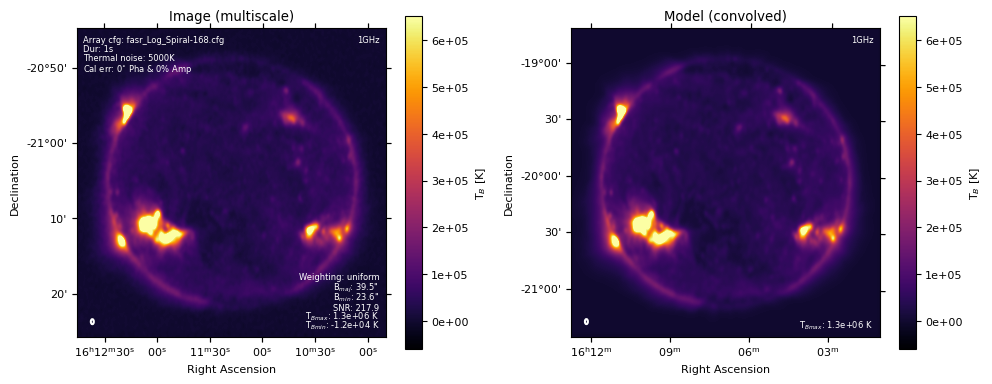

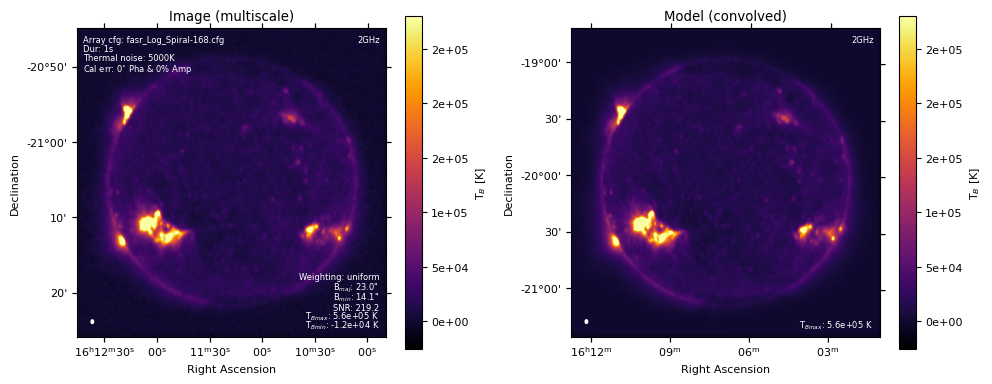

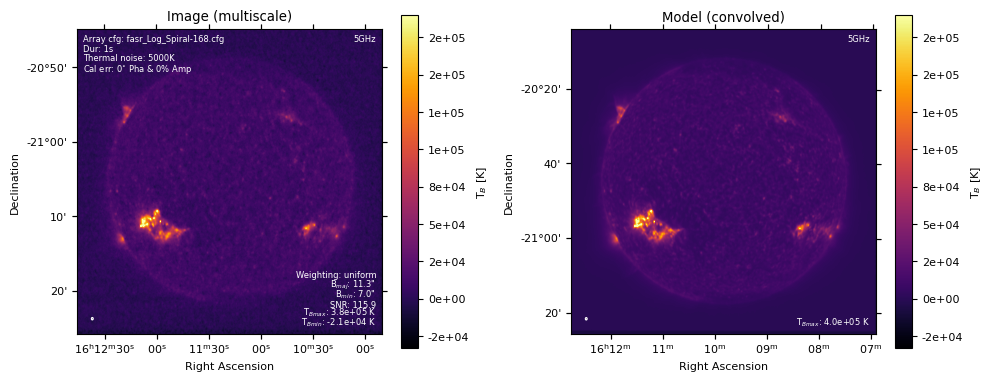

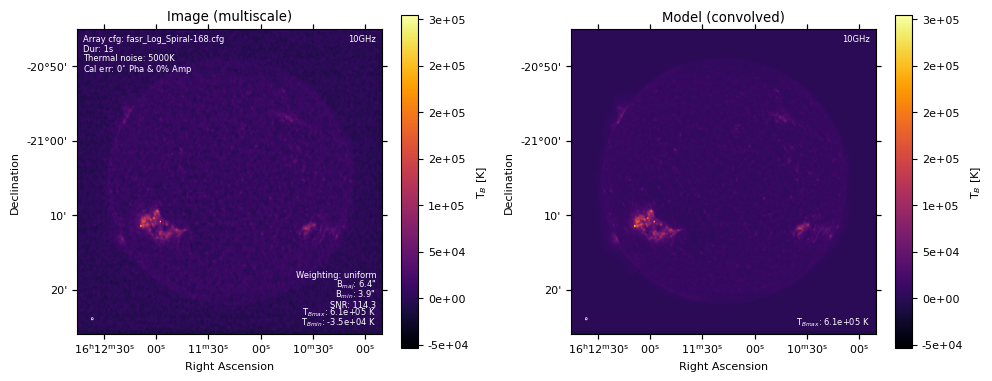

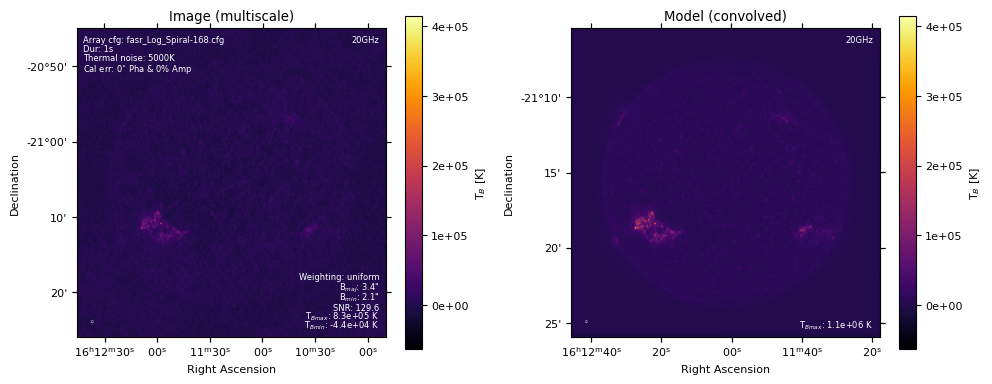

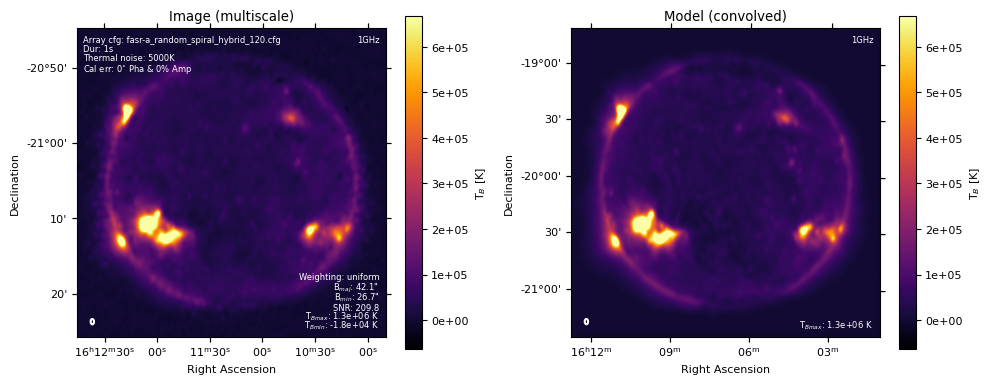

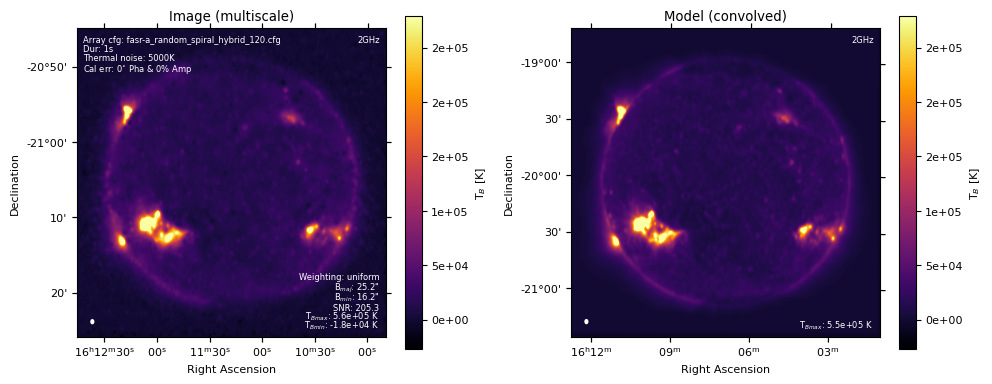

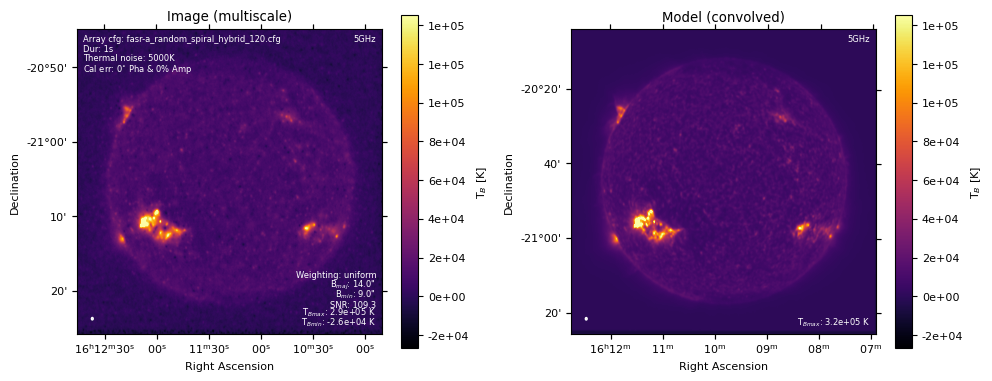

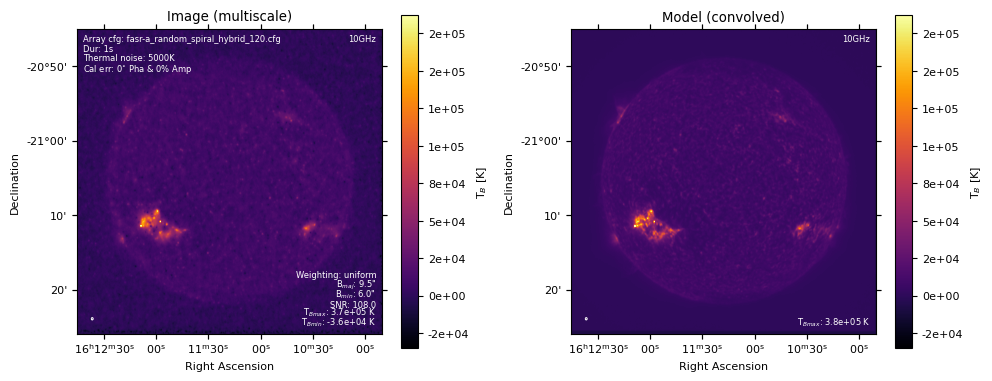

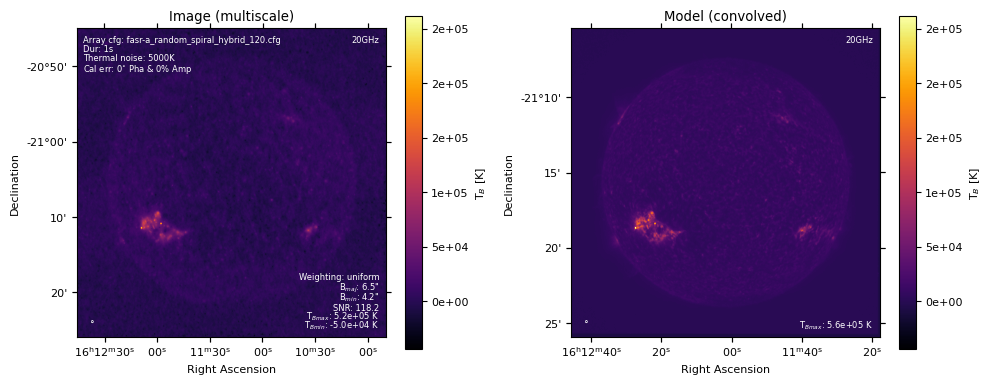

In [103]:
%matplotlib inline
reload(fss)

import time

reftime = reftime_obj.strftime('%Y/%m/%d/%H:%M:%S')

figdir = os.path.join(project, figsubfolder)
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
caltbdir = os.path.join(project, 'caltbs')
if not os.path.exists(caltbdir):
    os.makedirs(caltbdir)

for config_file in config_files:
    cfg_suffix = os.path.basename(config_file.rstrip(".cfg"))
    for freqstr, imsize, cell, scale in zip(freq_list, imsizes, cells, scales):
        solar_model = f'{model_dir}/solar_disk_model_20201126.{freqstr}.fits'
        for noise in noise_levels:
            for phaerr, amperr in cal_errors:
                phaerr_deg = np.rad2deg(phaerr * 2 * np.pi)
                gaintable = [f'caltb_FASR_corrupt_{phaerr_deg:.0f}deg.ph',
                             f'caltb_FASR_corrupt_{np.int_(amperr * 100)}pct.amp']
                msname = fss.make_msname(project, target, freqstr, reftime_obj, duration, integration_time, config_file, noise)
                imname = fss.make_imname(msname, deconvolver, phaerr, amperr)
                if niter == 0:
                    imname = imname.replace(deconvolver, 'dirty')
                msfile = f'{msname}.ms'
                if os.path.exists(msfile):
                    if overwrite_ms:
                        os.system('rm -rf ' + msfile)
                    else:
                        pass
                
                if not os.path.exists(msfile):
                    print('Start generating ms')
                    fss.generate_ms(config_file, solar_model, reftime, freqstr, integration_time=integration_time,
                                    duration=duration,
                                    msname=msfile, noise=noise, usehourangle=True)

                if os.path.exists(f'{imname}.image'):
                    if overwrite_im:
                        junk = ['.image', '.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                        for j in junk:
                            os.system(f'rm -rf {imname}{j}')

                if not os.path.exists(f'{imname}.image'):
                    tstart = time.time()
                    print('Start deconvolution')
                    if not os.path.exists(gaintable[0]):
                        gaintable = fss.generate_caltb(msfile, caltype=['ph', 'amp'], 
                                                       calerr=[phaerr, amperr], caltbdir=caltbdir)
                    clearcal(vis=msfile)
                    applycal(vis=msfile, gaintable=gaintable, applymode='calonly', calwt=False)
                    if deconvolver == 'hogbom':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)
                    elif deconvolver == 'multiscale':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, scales=scale, 
                               gain=0.2, cycleniter=200, minpsffraction=0.1, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)                        
                    junk = ['.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                    for j in junk:
                        os.system(f'rm -rf {imname}{j}')
                    tend = time.time()
                    print(f'deconvolution completed in {(tend - tstart)/60.:.2f} minutes')
                    

                figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.jpg')
                #figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.ar.jpg')
                if os.path.exists(figname):
                    if overwrite_plot:
                        os.system(f'rm -rf {figname}')

                if not os.path.exists(figname):
                    reload(fss)
                    ## cleaned image
                    image1 = imname + '.image'
                    ## model image
                    image2 = os.path.join(project+'/msfiles/Quiet_Sun/', os.path.basename(solar_model.replace('.fits', '.im')))
                    ## meta information of the images
                    image_meta = {'title': [f'Image ({deconvolver})', 'Model (convolved)'],
                                  'freq': freqstr.lstrip("0"),
                                  'array_config': config_file,
                                  'noise': f'{1e6 * float(noise.rstrip("MK")):.0f}K',
                                  'cal_error': f'{phaerr_deg:.0f}'+r'$^{\circ}$ Pha' + f' & {np.int_(amperr * 100)}% Amp',
                                  'duration': f'{duration}s',
                                  'weighting': weighting,
                                  }
                    print('Start plotting')
                    fig, axs = fss.plot_two_casa_images_with_convolution(image1, image2,
                                                                         crop_fraction=(0.0, 1.0),
                                                                         #crop_fraction=((0.17, 0.37), (0.25, 0.45)),
                                                                         figsize=(15, 4),
                                                                         image_meta=image_meta,
                                                                         cmap='inferno',
                                                                         vmax=50,
                                                                         compare_two=False,
                                                                         contour_levels=[0.025, 0.05, 0.1, 0.2, 0.4,
                                                                                         0.8],
                                                                         conv_tag=f'.{cfg_suffix}',
                                                                         overwrite_conv=False)

                    fig.savefig(figname, dpi=300)

## The following simulation is for FASR-B

In [105]:
# List of all available frequencies in GHz
freq_list = ['1GHz', '2GHz']
imsizes = [512, 512]
cells = ['4.8arcsec', '4.8arcsec']
scales = [[0, 5, 10, 50], [0, 4, 10, 40]]

# List of configurations
project = 'FASR-B'
config_files = ['fasr-b_spiral_72.cfg']

## Antenna temperature noise levels
noise_levels = ['0.005MK', '0.01MK'][:1]

## Define the fractional gain errors tuples: (phase and amplitude)
# 6 degrees (or 1.7% of phase error is equivalent to 10% of amplitude error )
#cal_errors = [(0., 0.), (0.017, 0.1)]
cal_errors = [(0., 0.)]

# Reference timestamp for the observation series
reftime_obj = datetime(2020, 11, 26, 20, 0, 0)

# Flags to control overwriting existing data products
overwrite_ms   = False  # Overwrite measurement set?
overwrite_im   = False  # Overwrite image products?
overwrite_plot = True  # Overwrite existing plots?

# Deconvolution algorithm choice
#deconvolver = 'hogbom'
#niter = 0
#weighting = 'uniform'

deconvolver = 'multiscale'
niter = 10000

# Imaging parameters (in seconds)
integration_time = 1  # Time per integration
duration         = 1  # Total imaging duration

Start plotting
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 1.315e+06 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_1GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 6.351e+03 K
SNR of the image: 207.1
Plotting image with vmin=-6.351e+04 K, vmax=6.577e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:47; runtime: 1.10 seconds
Start plotting
Peak of fasr_fasr-b_spiral_72_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image: 5.296e+05 K
rms of fasr_fasr-b_spiral_72_Quiet_Sun_2GHz_20201126T20UT_dur1s_int1s_noise0.005MK_phaerr0deg_amperr0pct_multiscale.image (excluding solar disk): 3.967e+03 K
SNR of the image: 133.5
Plotting image with vmin=-3.967e+04 K, vmax=2.648e+05 K


/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2122: UserWarning: FixedFormatter should only be used together with FixedLocator
  contour_levels = np.linspace(0.1, 0.9, 5) * np.nanmax(cropped1)
/Users/binchen/Dropbox/Projects/FASR/fasr-array-config-simul/fasr_solar_simul.py:2145: UserWarning: FixedFormatter should only be used together with FixedLocator
  Open two CASA images using casatools.image (IA), convolve the second image


'plot_two_casa_images_with_convolution' completed at 2026-01-29 10:22:48; runtime: 0.90 seconds


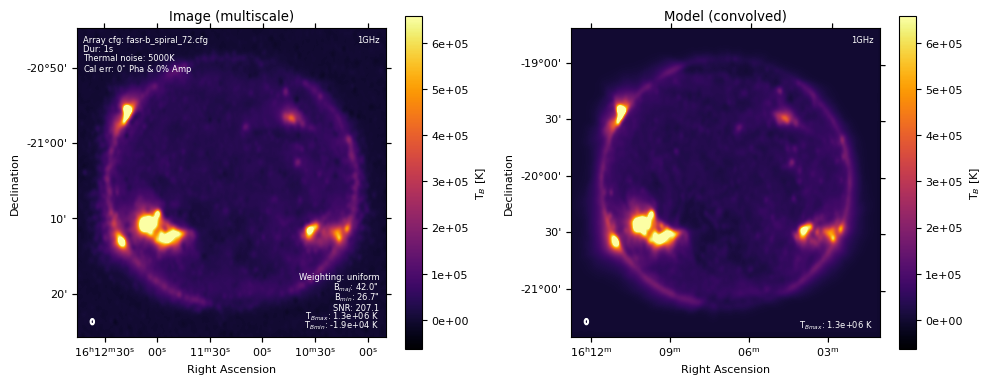

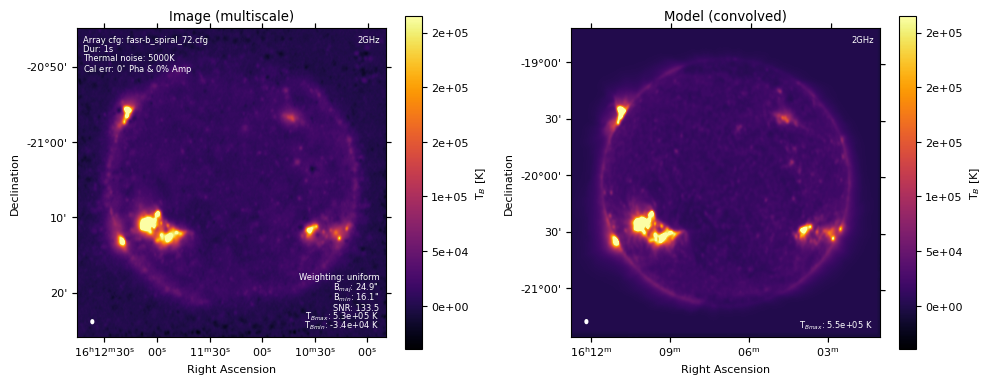

In [106]:
%matplotlib inline
reload(fss)

import time

reftime = reftime_obj.strftime('%Y/%m/%d/%H:%M:%S')

figdir = os.path.join(project, figsubfolder)
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
caltbdir = os.path.join(project, 'caltbs')
if not os.path.exists(caltbdir):
    os.makedirs(caltbdir)

for config_file in config_files:
    cfg_suffix = os.path.basename(config_file.rstrip(".cfg"))
    for freqstr, imsize, cell, scale in zip(freq_list, imsizes, cells, scales):
        solar_model = f'{model_dir}/solar_disk_model_20201126.{freqstr}.fits'
        for noise in noise_levels:
            for phaerr, amperr in cal_errors:
                phaerr_deg = np.rad2deg(phaerr * 2 * np.pi)
                gaintable = [f'{caltbdir}/caltb_FASR_corrupt_{phaerr_deg:.0f}deg.ph',
                             f'{caltbdir}/caltb_FASR_corrupt_{np.int_(amperr * 100)}pct.amp']
                msname = fss.make_msname(project, target, freqstr, reftime_obj, duration, integration_time, config_file, noise)
                imname = fss.make_imname(msname, deconvolver, phaerr, amperr)
                if niter == 0:
                    imname = imname.replace(deconvolver, 'dirty')
                msfile = f'{msname}.ms'
                if os.path.exists(msfile):
                    if overwrite_ms:
                        os.system('rm -rf ' + msfile)
                    else:
                        pass
                
                if not os.path.exists(msfile):
                    print('Start generating ms')
                    fss.generate_ms(config_file, solar_model, reftime, freqstr, integration_time=integration_time,
                                    duration=duration,
                                    msname=msfile, noise=noise, usehourangle=True)

                if os.path.exists(f'{imname}.image'):
                    if overwrite_im:
                        junk = ['.image', '.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                        for j in junk:
                            os.system(f'rm -rf {imname}{j}')

                if not os.path.exists(f'{imname}.image'):
                    tstart = time.time()
                    print('Start deconvolution')
                    if not os.path.exists(gaintable[0]):
                        gaintable = fss.generate_caltb(msfile, caltype=['ph', 'amp'], 
                                                       calerr=[phaerr, amperr], caltbdir=caltbdir)
                    clearcal(vis=msfile)
                    applycal(vis=msfile, gaintable=gaintable, applymode='calonly', calwt=False)
                    if deconvolver == 'hogbom':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)
                    elif deconvolver == 'multiscale':
                        tclean(vis=msfile, imagename=imname,
                               datacolumn='corrected',
                               field='', spw='', specmode='mfs', 
                               deconvolver=deconvolver, scales=scale, 
                               gain=0.2, cycleniter=200, minpsffraction=0.1, pblimit=0.01,
                               imsize=imsize, cell=cell,
                               weighting=weighting,
                               niter=niter,
                               interactive=False)                        
                    junk = ['.model', '.mask', '.pb', '.psf', '.residual', '.sumwt']
                    for j in junk:
                        os.system(f'rm -rf {imname}{j}')
                    tend = time.time()
                    print(f'deconvolution completed in {(tend - tstart)/60.:.2f} minutes')
                    

                figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.jpg')
                #figname = os.path.join(figdir, f'fig-{os.path.basename(imname)}.ar.jpg')
                if os.path.exists(figname):
                    if overwrite_plot:
                        os.system(f'rm -rf {figname}')

                if not os.path.exists(figname):
                    reload(fss)
                    ## cleaned image
                    image1 = imname + '.image'
                    ## model image
                    image2 = os.path.join(project+'/msfiles/Quiet_Sun/', os.path.basename(solar_model.replace('.fits', '.im')))
                    ## meta information of the images
                    image_meta = {'title': [f'Image ({deconvolver})', 'Model (convolved)'],
                                  'freq': freqstr.lstrip("0"),
                                  'array_config': config_file,
                                  'noise': f'{1e6 * float(noise.rstrip("MK")):.0f}K',
                                  'cal_error': f'{phaerr_deg:.0f}'+r'$^{\circ}$ Pha' + f' & {np.int_(amperr * 100)}% Amp',
                                  'duration': f'{duration}s',
                                  'weighting': weighting,
                                  }
                    print('Start plotting')
                    fig, axs = fss.plot_two_casa_images_with_convolution(image1, image2,
                                                                         crop_fraction=(0.0, 1.0),
                                                                         #crop_fraction=((0.17, 0.37), (0.25, 0.45)),
                                                                         figsize=(15, 4),
                                                                         image_meta=image_meta,
                                                                         cmap='inferno',
                                                                         vmax=50,
                                                                         compare_two=False,
                                                                         contour_levels=[0.025, 0.05, 0.1, 0.2, 0.4,
                                                                                         0.8],
                                                                         conv_tag=f'.{cfg_suffix}',
                                                                         overwrite_conv=False)

                    fig.savefig(figname, dpi=300)